# AQ1 
What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

```
Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N)
```

---

## What does the algorithm do?
The following algorithm outputs permutations of the characters given as input as a list. A permutation is defined as *each of the several possible ways in which a set or number of things can be ordered or arranged*.

## How does it do it?
The general idea behind recursively creating a permutation of a sequence of characters is that we go through all characters in the sequence, **freeze** a portion of the sequence and permute the remaining characters. 

### f1
In the first function `f1`, we receive as input:
* `sequence`: a sequence of characters. 
* `end`: an integer. 

The function prints all characters in the sequence on separate lines, followed by a final new line at the end.

---

### f2
In the second function `f2`, we the input is:
* `sequence`: a sequence of characters.
* `start`: an integer that specifies the start index of the sequence of characters.
* `end`: an integer that specifies the end index of the sequence of characters.

If the two values `start` and `end` are equal, it means that we have reached the end of a single permutation, and the function `f1` described above is called to print the permuted sequence of characters.

If the value of `start` is different from the value of `end`, we loop over all indeces from `start` to `end`. During each iteration of the loop, we first swap the starting value of the sequence with the `ith` character in the sequence.

E.g. when `start = 0` and `i = 1`, we get `abc` -> `bac`.

We do this because we want to **freeze** a start character in place while permuting the remaining characters in the sequence. Permuting the subsequence is the same as permuting the entire sequence, so we make a recursive call to `f2` with the start value increased by `1`, which will make the for loop operate over a smaller subsequence of the original sequence. We will hit the bottom of the recursion tree when the subsequence is of length 1, at which point `f1` is called and a single character is printed. Once we have exited a recursive call, we again swap the start with the `ith` character in the sequence.

The recursion tree below shows the swapping and freezing of characters in the sequence `ABC`, to create all permutations.

---

![permutation_recursion_tree](docs/permutation_recursion_tree.svg)

---

In [2]:
N = int(input()) # integer
List = list(input()) # array of characters of length N without repetition

def f1(sequence, end): 
    for i in range(0,end):
        print(sequence[i])
    print("\n")
    
    
def f2(sequence, start, end): 
    if start == end: 
        f1(sequence, end)
    else:
        for i in range(start, end): 
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            f2(sequence, start+1, end)
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp

f2(List, 0, N)

3
abc
a
b
c


a
c
b


b
a
c


b
c
a


c
b
a


c
a
b




## Complexity
Per definition, the number of permutations for a set $S$ with $n$ elements is $n!$. To print a single permutation using the recursive algorithm, we need to go down the entire tree until we hit a leaf, which is $n$ operations. Since we need to do this for $n!$ permutations, we have a time complexity of $O(n \times n!) = O(n!)$.

## Is this algorithm the optimal one to produce this output?
Since we always need to compute $n!$ permutations, any algorithm will be bounded by $O(n!)$. There are other algorithms that find all permutations differently but still have the same time complexity, e.g. [Steinhaus–Johnson–Trotter algorithm](https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm).

--- 

# AQ2 Ribbon Cutting

In [43]:
import timeit
import matplotlib.pyplot as plt

## 1. Naive Recursive Algorithm

---

### Idea
The general idea behind a recursive algorithm for calculating the maximum product of a ribbon of length $n$, is that we find **all possible ways** to cut the ribbon into two parts $(a, b)$. For each pair of parts, we want to find **two** products:

1. The product of the lengths.
1. The product of part $a$ and the maximum product of $b$. 

We take the **max** of the two products because the length of part $b$ is **not necessarily** the maximum product of $b$. The max will be a **candidate maximum product** for the ribbon.

Do this for all possible pairs of the ribbon and find the max of all candidate maximum products. This value will be the maximum product of the ribbon.

#### Steps
1. Find all ways to cut the ribbon into two parts $(a, b)$.
1. For each pair, find the product of the lengths.
1. For each pair, find the product of the first cut and the maximum product of the second cut.
1. For each pair, get the max of the two products.
1. If the max is greater than the existing max, replace it.

#### Example, n = 3
For $n=3$ our possible pairs are $(1, 2), (2, 1)$. 

Products of lengths is $1 \times 2 = 2$ and $2 \times 1 = 2$.

Max products of the second cuts are $max\_product(2) = 1 \times 1 = 1$ and $max\_product(1) = 0$

Max of the products of the second cuts and the products of the lengths is $max(2, 1) = 2$ and $max(2, 0) = 2$.

Max of the product of lengths is $max(2, 2) = 2$.

The maximum product of a ribbon of length $3$ is $2$.

---

### Algorithm

#### Base Case
We know that the max of a ribbon of length 0 or 1 is 0, because there is no way to cut the ribbon into integer sized pieces. A ribbon of length 0 is a ribbon that doesn't exist. A ribbon of length 1 cannot be cut without creating pieces that are of non-integer sizes.

$max\_product(0) = max\_product(1) = 0$.

#### Other cases
For ribbons that have length $n > 1$, we do parts 1 - 5 as described in the Steps section. 

In [44]:
def max_ribbon_product_naive(n):
    """Recursively calculates the maximum product of integer sized pieces of a ribbon of length n.

    :args
    n - integer that is the length of the ribbon.

    :return
    an integer that is the maximum product.
    """
    # base case
    if n <= 1:
        return 0

    max_product = 0

    # 1
    for ribbon_length_to_remove in range(1, n):
        remaining_ribbon = n - ribbon_length_to_remove
        smaller_ribbon_product = ribbon_length_to_remove * max_ribbon_product_naive(remaining_ribbon)
        
        # 2
        product_of_ribbon_lengths = ribbon_length_to_remove * smaller_ribbon_product
        
        # 3
        product_of_length_and_max_product = ribbon_length_to_remove * (remaining_ribbon - ribbon_length_to_remove)
        
        # 4
        current_max = max(product_of_ribbon_lengths, product_of_length_and_max_product)
        
        # 5
        max_product = max(current_max, max_product)

    return max_product

## 2. Naive Ribbon Cutting Recursion Tree
The image below shows a recursion tree for the naive ribbon cutting when $n=4$. To calculate the maximum product for $n=4$, we do a depth first traversal from left to right.

This approach means that we perform unnecessary computations, as $max\_ribbon\_product\_naive(2)$ is computed twice for example. For small values of $n$ this is not a problem, howeverr as $n$ grows to larger values, the number of redundant computations being made grows exponentially.

---
![naive_ribbon_recursive_tree](docs/naive_ribbon_recursion_tree.svg)

---

### Complexity
Let $R(n)$ be the function that computes the product of ribbon of length $n$. In the naive function, we have a loop from $1 - n$ in which we make $n - 2$ recursive calls. Hence, we can write the cost of the function $R(n)$ as:

$$ R(n) = R(n-1) + R(n-2) + R(n-3) + ... + R(1)$$

Let us look at the individual terms of this sum. The cost of $R(n1)$ is:

$$R(n-1) = R(n-2) + R(n-3) + ... + R(1)$$

The terms coming after $R(n-1)$ in the first sum are actually equal to $R(n-1)$, as can be seen above. Substituting we get that:

$$R(n) = R(n-1) + R(n-1) = 2R(n-1)$$

Following this logic for all $(n - k)$, we get:

\begin{align}
R(n) &= R(n-1) + R(n-2) + R(n-3) + ... + R(1) \\ 
& = R(n-1) + R(n-1) \\
& = 2R(n-1) \\
& = 2 \times 2R(n-2) \\
& = 2 \times 2 \times 2R(n-3) \\
& = 2^{n-1} \times 2R(n-(n-1)) \\
& = 2^{n-1} \times 2R(1) \\
& = 2^{n-1} \\
\end{align}

Which is an exponential time complexity $O(2^n)$.

---

## 3. Dynamic Ribbon Cutting
The dynamic programming version of the ribbon cutting algorithm mostly follows the same steps as the naive version. 

The difference that makes this version much faster is that a dictionary is used to store results once they are calculated. Each entry in the dictionary is a key-value pair of the ribbon length that is currently checked and the maximum product of that ribbon length. 

Whenever the function is called for a ribbon length $n$, the dictionary is checked for an entry $n$. If found, the value from the dictionary is returned. This basically gives us $O(1)$ for an $n$ that has already been computed (depending on the hash function).

In [45]:
def max_ribbon_product_dynamic(n, seen):
    """Calculates the maximum product of integer sized pieces of a ribbon of length n using dynamic programming.

    :args
    n - integer that is the length of the ribbon.
    seen - a dictionary of seen values.

    :return
    an integer that is the maximum product.
    """
    if n in seen:
        return seen[n]
    
    # base case
    if n <= 1:
        seen[n] = 0
        return seen[n]

    max_product = 0

    for ribbon_length_to_remove in range(1, n):
        remaining_ribbon = n - ribbon_length_to_remove
        seen_max_product = max_ribbon_product_dynamic(remaining_ribbon, seen)
        seen[remaining_ribbon] = seen_max_product
        ribbon_length_product = ribbon_length_to_remove * seen_max_product            
        
        # 2
        product_of_ribbon_lengths = ribbon_length_to_remove * ribbon_length_product
        
        # 3
        product_of_length_and_max_product = ribbon_length_to_remove * (remaining_ribbon - ribbon_length_to_remove)
        
        # 4
        current_max = max(product_of_ribbon_lengths, product_of_length_and_max_product)
        
        # 5
        max_product = max(current_max, max_product)

    return max_product

## 4. Dynamic Ribbon Cutting Recursion Tree
The image below shows a recursion tree for the dynamic ribbon cutting when $n=4$. To calculate the maximum product for $n=4$, we do a depth first traversal from left to right.

In contrast to the naive ribbon recursion tree, we can eliminate the right hand branch because by the time we ask for $max_ribbon_product_dynamic(2)$, we have already calculated it in the left branch.

For smaller values for $n$, the computational difference is small. As $n$ grows however, the gain made by eliminating branches is significant, and the overall function becomes polynomial instead of exponential.

---

![dynamic_ribbon_recursion_tree](docs/dynamic_ribbon_recursion_tree.svg)

---

### Complexity
Using dynamic programming, we only have to go down the recursive tree once until we hit the first leaf. Once we have done that, we will have a value stored for each $n$ and retrieving the value is a constant time $O(1)$. 

We are still making $n-1$ recursive calls, however for each recursive call we don't need to go down the entire tree. Only the traversal to the first leaf goes all the way down. This means that once we have done $n-1$ iterations, all other computations we need to do are constants.

Again, let the cost of the ribbon function $R(n)$ be 

$$R(n) = R(n-1) + R(n-2) + R(n-3) + ... + R(1)$$

Calculating $R(n-1)$ means that we now have calculated and stored the values for all $R(n-k)$, which means that any recursive calls thereafter, are constant operations $O(1)$, and we just need to count the loops. 

Since we cut the ribbon $(n-1)$ times, and every part that we end up with we also cut $(n-1)$ times, we get the complexity

$$(n-1)(n-1) = n^2 - 2n + 2$$

Which is a polynomial time complexity $O(n^2)$ as $n^2$ is the dominating term.

## 5. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results

In [49]:
naive_times = []
dynamic_times = []

n_dynamic_runs = int(10e4)
start_length = 2
end_length = 26

for ribbon_length in range(start_length, end_length):
    naive_time = timeit.timeit(stmt='max_ribbon_product_naive(ribbon_length)', setup='pass', number=1, globals=globals())
    dynamic_time = timeit.timeit(stmt='max_ribbon_product_dynamic(ribbon_length, {})', setup='pass', number=n_dynamic_runs, globals=globals())
    
    naive_times.append(naive_time)
    dynamic_times.append(dynamic_time / n_dynamic_runs)

### Naive Max Ribbon Plot
The execution time for the naive max ribbon algorithm appears to follow an exponential curve, though the algorithm was only timed **once** for each ribbon length value, due to the long runtime, and is therefore susceptible to noise.

Text(0, 0.5, 'Execution Time in seconds')

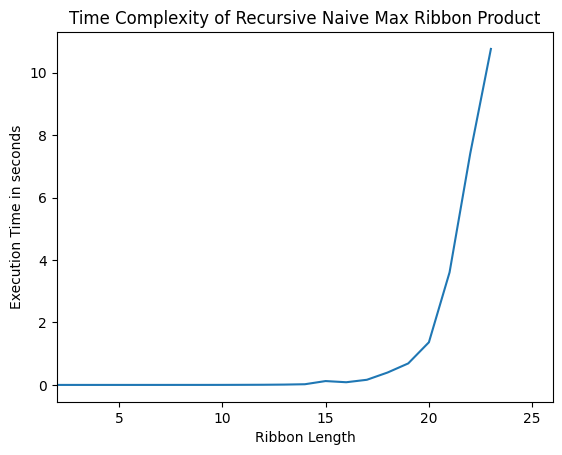

In [47]:
plt.plot(naive_times)
plt.xlim(start_length, end_length)
plt.title("Time Complexity of Recursive Naive Max Ribbon Product")
plt.xlabel("Ribbon Length")
plt.ylabel("Execution Time in seconds")

### Dynamic Max Ribbon Plot
The execution time for the naive max ribbon algorithm appears to follow a logarithmic curve. The times for each ribbon length were averaged over 10,000 runs. This provides a somewhat smooth curve with minor noise. More runs for a larger interval of ribbon lengths would possibly produce a more conclusive result.

Text(0, 0.5, 'Execution Time in seconds')

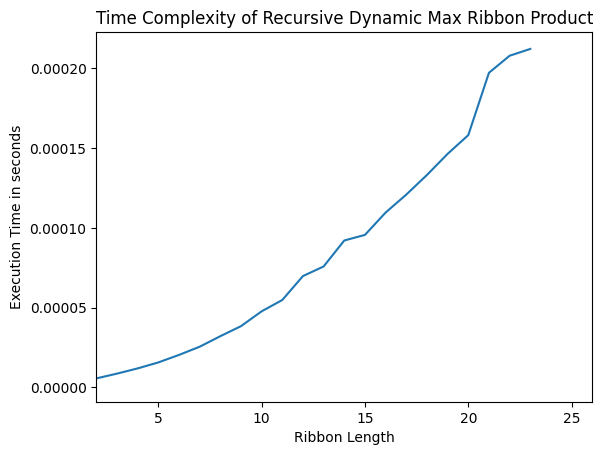

In [50]:
plt.plot(dynamic_times)
plt.xlim(start_length, end_length)
plt.title("Time Complexity of Recursive Dynamic Max Ribbon Product")
plt.xlabel("Ribbon Length")
plt.ylabel("Execution Time in seconds")